# Classifying baby names

In [2]:
!pip install pycaret
!wget https://www.nrscotland.gov.uk/files//statistics/babies-names/22/babies-first-names-all-names-all-years.csv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.6

In [4]:
import pycaret
from pycaret.classification  import *
from pandas import read_csv, concat

def tolower(s):
    return s.lower()

url = 'babies-first-names-all-names-all-years.csv'
df = read_csv(url, usecols=['sex', 'FirstForename'],
converters={'FirstForename':tolower})

In [7]:
df[['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10']] = \
    df['FirstForename'].str.extract( \
    '(.?)(.?)(.?)(.?)(.?)(.?)(.?)(.?)(.?)(.?)', expand=True)

In [8]:
df = df.drop('FirstForename', axis=1)
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print(df.shape)
print(df.head())
print(df.tail())

(73772, 11)
  sex n1 n2 n3 n4 n5 n6 n7 n8 n9 n10
0   B  a  a  m  i  r                
1   B  a  a  r  o  n                
2   B  a  b  d  u  l                
3   B  a  b  d  u  l  l  a  h  i    
4   B  a  b  d  u  l  r  a  z  a   k
      sex n1 n2 n3 n4 n5 n6 n7 n8 n9 n10
73767   G  z  o  l  a  r  o  s  e       
73768   G  z  u  l  e  y  a             
73769   G  z  u  z  z  a  n  n  a       
73770   G  z  y  a                      
73771   G  z  y  v  a                   


In [10]:
grid = setup(data=df, target='sex', session_id=42)

,Description,Value
0,Session id,42
1,Target,sex
2,Target type,Binary
3,Target mapping,"B: 0, G: 1"
4,Original data shape,"(73772, 11)"
5,Transformed data shape,"(73772, 11)"
6,Transformed train set shape,"(51640, 11)"
7,Transformed test set shape,"(22132, 11)"
8,Categorical features,10
9,Preprocess,True


In [11]:
best = compare_models(sort='Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7804,0.0000,0.7804,0.7814,0.7808,0.5444,0.5446,1.2670
lightgbm,Light Gradient Boosting Machine,0.7618,0.0000,0.7618,0.7629,0.7623,0.5058,0.5060,2.6030
rf,Random Forest Classifier,0.7444,0.0000,0.7444,0.7432,0.7437,0.4648,0.4650,7.0120
et,Extra Trees Classifier,0.7403,0.0000,0.7403,0.7388,0.7394,0.4553,0.4556,6.6600
gbc,Gradient Boosting Classifier,0.7172,0.0000,0.7172,0.7132,0.7125,0.3960,0.3993,4.5800
knn,K Neighbors Classifier,0.7025,0.0000,0.7025,0.6985,0.6990,0.3686,0.3703,2.4590
dt,Decision Tree Classifier,0.6848,0.0000,0.6848,0.6867,0.6856,0.3470,0.3472,1.0600
ada,Ada Boost Classifier,0.6867,0.0000,0.6867,0.6807,0.6786,0.3238,0.3293,1.9640
lr,Logistic Regression,0.6674,0.0000,0.6674,0.6596,0.6567,0.2776,0.2842,1.6360
lda,Linear Discriminant Analysis,0.6670,0.0000,0.6670,0.6592,0.6567,0.2776,0.2838,0.8910


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Note that Google Colaboratory, where I am running this, choses a different algorithm to the local PyCaret I ran in the book. Extreme Gradient Boosting offers a better solution than both the K Neighbors Classifier and the Decision Tree Classifier. It is the best for all of the metrics. As a result there is no difference here between Precision and Kappa.

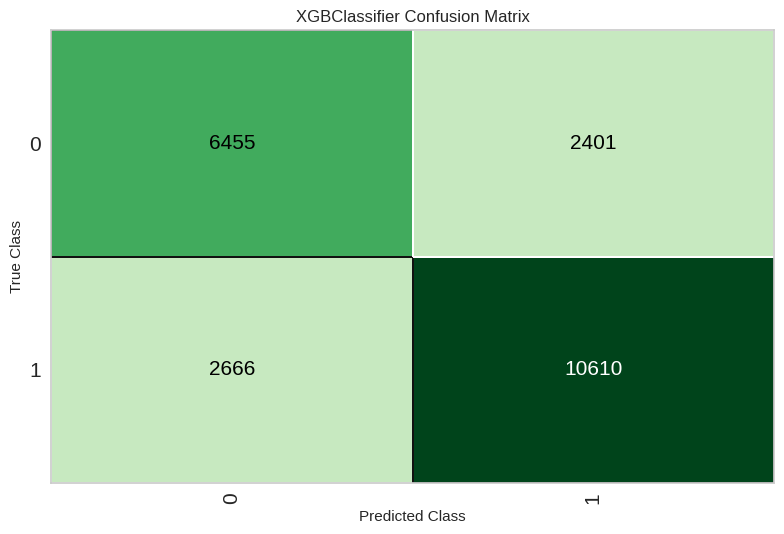

In [12]:
plot_model(best, 'confusion_matrix')

In [14]:
best = compare_models(sort='Kappa')
besttuned = tune_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7804,0.0000,0.7804,0.7814,0.7808,0.5444,0.5446,1.1950
lightgbm,Light Gradient Boosting Machine,0.7618,0.0000,0.7618,0.7629,0.7623,0.5058,0.5060,2.2340
rf,Random Forest Classifier,0.7444,0.0000,0.7444,0.7432,0.7437,0.4648,0.4650,6.9580
et,Extra Trees Classifier,0.7403,0.0000,0.7403,0.7388,0.7394,0.4553,0.4556,6.6660
gbc,Gradient Boosting Classifier,0.7172,0.0000,0.7172,0.7132,0.7125,0.3960,0.3993,4.6800
knn,K Neighbors Classifier,0.7025,0.0000,0.7025,0.6985,0.6990,0.3686,0.3703,2.6590
dt,Decision Tree Classifier,0.6848,0.0000,0.6848,0.6867,0.6856,0.3470,0.3472,1.0670
ada,Ada Boost Classifier,0.6867,0.0000,0.6867,0.6807,0.6786,0.3238,0.3293,1.8850
qda,Quadratic Discriminant Analysis,0.6538,0.0000,0.6538,0.6548,0.6542,0.2807,0.2808,0.8970
lr,Logistic Regression,0.6674,0.0000,0.6674,0.6596,0.6567,0.2776,0.2842,1.6220


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6603,0.0000,0.6603,0.7415,0.5815,0.1829,0.2906
1,0.6603,0.0000,0.6603,0.7592,0.5773,0.1797,0.2993
2,0.6625,0.0000,0.6625,0.7489,0.5838,0.1878,0.2993
3,0.6576,0.0000,0.6576,0.7351,0.5778,0.1761,0.2809
4,0.6640,0.0000,0.6640,0.7471,0.5872,0.1923,0.3017
5,0.6570,0.0000,0.6570,0.7490,0.5730,0.1712,0.2858
6,0.6594,0.0000,0.6594,0.7420,0.5793,0.1795,0.2881
7,0.6609,0.0000,0.6609,0.7398,0.5830,0.1846,0.2907
8,0.6559,0.0000,0.6559,0.7331,0.5746,0.1708,0.2753


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


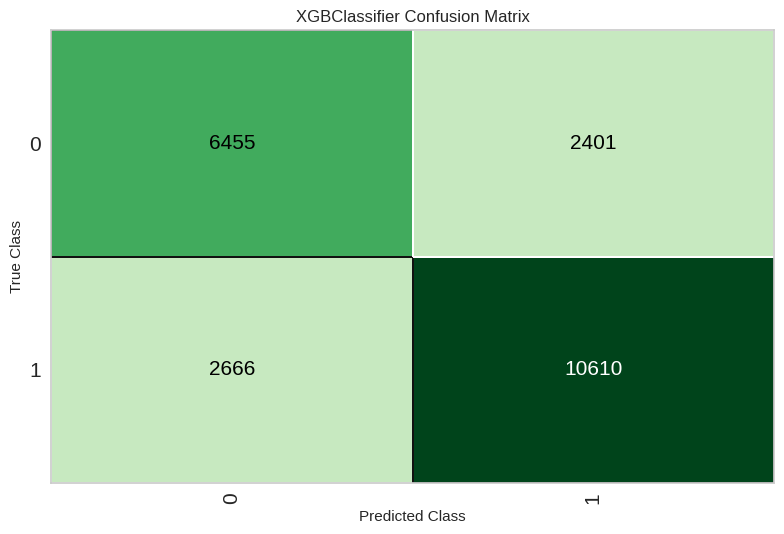

In [16]:
plot_model(besttuned, 'confusion_matrix')

# Using the model

In [17]:
from pandas import DataFrame
import pycaret.classification as pcc
final_best = pcc.finalize_model(besttuned)

In [18]:
data = DataFrame([['harry'], ['cerise'],                        [
 'gerlos'], ['ansna'], ['peytr']])
data.columns=['FirstForename']
print(data)

  FirstForename
0         harry
1        cerise
2        gerlos
3         ansna
4         peytr


In [20]:
data[['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10']] = \
    data['FirstForename'].str.extract( \
      '(.?)(.?)(.?)(.?)(.?)(.?)(.?)(.?)(.?)(.?)', expand=True)
prep_data = data.drop('FirstForename', axis = 1)
print(prep_data)

  n1 n2 n3 n4 n5 n6 n7 n8 n9 n10
0  h  a  r  r  y                
1  c  e  r  i  s  e             
2  g  e  r  l  o  s             
3  a  n  s  n  a                
4  p  e  y  t  r                


In [21]:
pred = pcc.predict_model(final_best, prep_data)
pred = pred.join(data['FirstForename'])
pred.drop(pred.iloc[:, 0:10], inplace=True, axis=1)
pred

,prediction_label,prediction_score,FirstForename
0,B,0.5528,harry
1,G,0.8327,cerise
2,B,0.8648,gerlos
3,G,0.9448,ansna
4,B,0.5146,peytr


In [23]:
result = {}
for row in pred.itertuples(index=False):
    result[row.FirstForename] = row.prediction_label
print(result)
print ('Peytr is a', result['peytr'])

{'harry': 'B', 'cerise': 'G', 'gerlos': 'B', 'ansna': 'G', 'peytr': 'B'}
Peytr is a B


# More plots

In [24]:
plot_model(best, plot='auc', save=True)

'AUC.png'

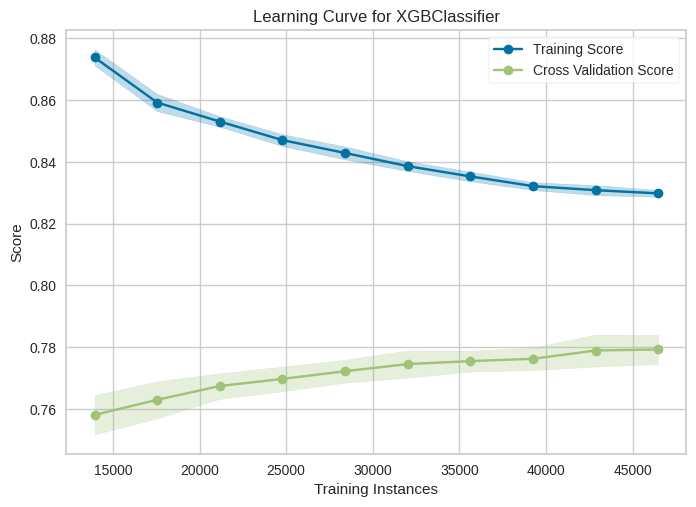

In [26]:
plot_model(best, plot='learning')

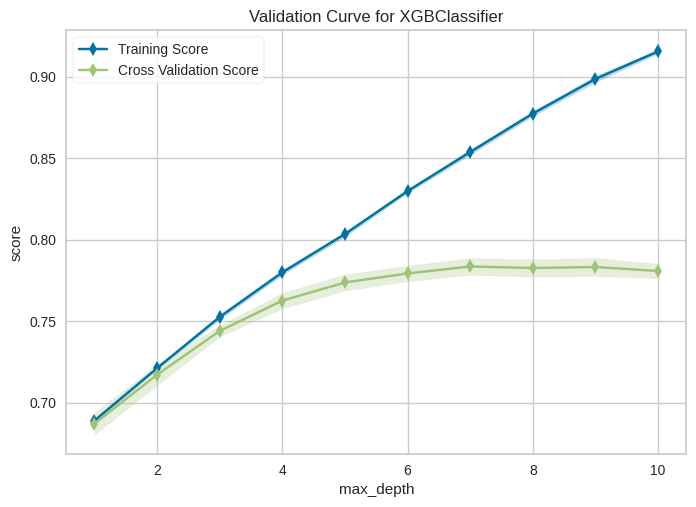

In [27]:
plot_model(best, plot='vc')

In [29]:
plot_model(best, plot='parameter')

,Parameters
objective,binary:logistic
base_score,None
booster,gbtree
callbacks,None
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,None
device,cpu
early_stopping_rounds,None
enable_categorical,False
